# Stability
This notebook will illustrate an unstable method using the  Abysmal Kramer-Butler method. The method is named after the great [Cosmo Kramer]( https://en.wikipedia.org/wiki/Cosmo_Kramer).


To determine stabilty we need three definitions:

#### Definition: Characteristic Equation
Associated with the difference equation 
$$ w_0=\alpha \ \ \ w_1=\alpha_1 \ \ \ ... \ \ \ w_{m-1}=\alpha_{m-1} $$
$$w_{i+1} = a_{m-1}w_{i}+a_{m-2}w_{i-1}+...+a_{0}w_{i+1-m} +hF(t_i,h,w_{i+1},...,w_{i+1-m}),$$
is the __characteristic equation__ given by
$$\lambda^{m} - a_{m-1}\lambda^{m-1}-a_{m-2}\lambda^{m-2}-...-a_{0} =0. $$

#### Definition: Root Condition 

Let $\lambda_1,...,\lambda_m$ denote the roots of the that characteristic equation
$$\lambda^{m} - a_{m-1}\lambda^{m-1}-a_{m-2}\lambda^{m-2}-...-a_{0} =0 $$
associated with the multi-step difference method
$$ w_0=\alpha \ \ \ w_1=\alpha_1 \ \ \ ... \ \ \ w_{m-1}=\alpha_{m-1} $$
$$ w_{i+1} = a_{m-1}w_{i}+a_{m-2}w_{i-1}+...+a_{0}w_{i+1-m} +hF(t_i,h,w_{i+1},...,w_{i+1-m}),$$
If $|\lambda_{i}|\leq 1$ for each $i=1,...,m$ and all roots with absolute value 1
are simple roots then the difference equation is said to satisfy the __root condition__.

#### Definition: Stability
1. Methods that satisfy the root condition and have $\lambda=1$ as the only root 
of the characteristic equation of magnitude one are called __strongly stable__;
2. Methods that satisfy the root condition and have more than one distinct root
with magnitude one are called __weakly stable__;
3. Methods that do not satisfy the root condition are called __unstable__.

All one step methods, Adams-Bashforth and Adams-Moulton methods are stongly stable
## Intial Value Problem
The differential equation
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1,$$
will be the used to illustrate this.

## Python Libraries

In [1]:
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

### Defining the function
$$ f(t,y)=t-y.$$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a≤t≤b$  and number of steps  $N$ 
$$h=b−ah.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a.$

Text(0.5, 1.0, 'Illustration of discrete time points')

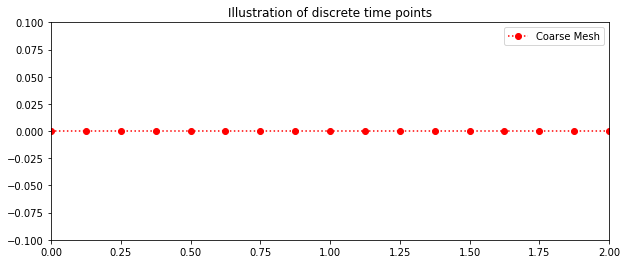

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N=16
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red',label='Coarse Mesh')
plt.xlim((0,2))
plt.ylim((-0.1,.1))

plt.legend()
plt.title('Illustration of discrete time points')

## 2-step Modified Abysmal Kramer-Butler Method

The 2-step Abysmal Kramer-Butler difference equation is
$$w_{i+1} = w_{i-1} + h(4f(t_i,w_i)-2f(t_{i-1},w_{i-1})) $$
by changing $F$, the Modified Abysmal Butler Method, is consistent and convergent.

For $i=0$ the system of difference equation is:
$$w_{1} = w_{-1} + h(4(t_0-w_0)-2(t_{-1}-w_{-1})) $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w_{2} = w_{0} + h(4(t_1-w_1)-2(t_{0}-w_{0})) $$
this is not solvable as <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [4]:
### Initial conditions
IC=1
w=np.zeros(len(t))
y=(2)*np.exp(-t)+t-1
w[0]=IC
w[1]=y[1]

### Loop

In [5]:
for k in range (1,N):
    w[k+1]=(w[k-1]+h*(4*myfun_ty(t[k],w[k])-2*myfun_ty(t[k-1],w[k-1])))   


### Plotting solution

In [6]:
def plotting(t,w,y):
    
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,w,'^:',color='red',label='Abysmal Kramer-Butler (N)')
    plt.plot(t,y, 'o-',color='black',label='Exact?')
    plt.xlabel('time')
    plt.legend()
    plt.title('Abysmal Abysmal Kramer-Butler')
    plt.show 

The plot below shows the Abysmal Kramer-Butler approximation for a low N (red) and the exact solution (black) of the intial value problem.

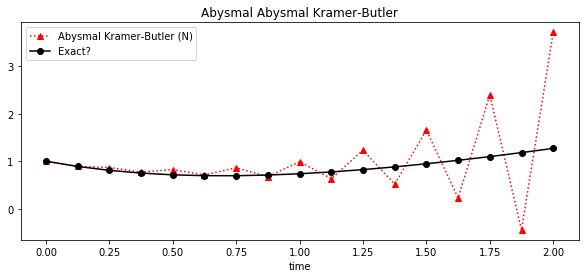

In [7]:
plotting(t,w,y)


## Consistent 
The Modified Abysmal Kramer-Butler method does satisfy the consistency condition
$$\tau_{i}(h)=\frac{y_{i+1}-y_{i-1}}{2h}-\frac{1}{2}[4(f(t_i,y_i)-32(t_{i-1},y_{i-1})] $$
As $h \rightarrow 0$  $$\frac{1}{2}[4(f(t_i,y_i)-2f(t_{i-1},y_{i-1})] \rightarrow f(t_i,y_i).$$
While as $h \rightarrow 0$  $$\frac{y_{i+1}-y_{i-1}}{2h} \rightarrow \frac{y^{'}}{2}=\frac{f(t_i,y_i)}{2}.$$
Hence as $h \rightarrow 0$ $$\frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-2f(t_{i-1},y_{i-1})]\rightarrow f(t_i,y_i)-f(t_i,y_i)=\frac{f(t_i,y_i)}{2},$$
which means it is consistent.

## Convergent 
The Modified Abysmal Kramer-Butler method does satisfy the Lipschitz condition:
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}f(t,w_i)-\frac{2}{2}f(t-h,w_{i-1}))-(\frac{4}{2}f(t,\hat{w}_{i})-\frac{2}{2}f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}(f(t,w_i)-f(t,\hat{w}_i))-\frac{2}{2}(f(t-h,w_{i-1}))-f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)\leq\frac{4}{2}L|w_i-\hat{w_i}|+\frac{2}{2}L|w-\hat{w}|\leq \frac{6}{2} L|w_i-\hat{w_i}|$$
This means it is internally convergent,
$$|w_i-w^2_i|\rightarrow 0$$ 
as $h \rightarrow 0$.
## Stability
The Modified Abysmal Kramer-Butler method does __not__ satisfy the stability condition.
The characteristic equation of the 
$$w_{i+1} = w_{i-1} + h(4f(t_i,w_i)-2f(t_{i-1},w_{i-1})) $$
is
$$\lambda^2 = 1, $$
This has two roots $\lambda=1$ and   $\lambda=-1$, hence the method is weakly stable.

In [10]:
n=10
d = {'time': t[0:n], 'Abysmal Kramer-Butler w': w[0:n],'Exact Error abs':np.abs(y[0:n]-w[0:n]),
     'Exact Error':(y[0:n]-w[0:n])}
df = pd.DataFrame(data=d)
df

,time,Abysmal Kramer-Butler w,Exact Error abs,Exact Error
0,0.000,1.000000,0.000000,0.000000
1,0.125,0.889994,0.000000,0.000000
2,0.250,0.867503,0.059902,-0.059902
3,0.375,0.772491,0.022912,-0.022912
4,0.500,0.823134,0.110072,-0.110072
5,0.625,0.710297,0.014774,-0.014774
6,0.750,0.861269,0.166535,-0.166535
7,0.875,0.675986,0.032738,0.032738
8,1.000,0.988592,0.252834,-0.252834
9,1.125,0.631937,0.142368,0.142368
